# TensorFlow and Deep Learning: MNIST aka Hello World!

## TOC:
* [Softmax](#softmax)
* [5 fully-connected layers](#5-fully)
* [Convolutional](#convolutional)
* [Convolutional Batch Normalization](#convolutional_batch)
* [Results](#results)
    * [Addendum](#addendum)

<font color=red>__Disclaimer__: contents self-adapted from _Tensorflow and deep learning - without a PhD_ by Martin Görner [link](https://www.youtube.com/watch?v=vq2nnJ4g6N0&feature=youtu.be>link). (Tutorial's [code](https://github.com/martin-gorner/tensorflow-mnist-tutorial))
</font>

General imports:

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import math
import os
import numpy as np
import imageio
%matplotlib inline  

__MNIST data__

The MNIST data is split into three parts: 55,000 data points of training data (`mnist.train`), 10,000 points of test data (`mnist.test`), and 5,000 points of validation data (`mnist.validation`). 

__Get the data__

In [2]:
mnist = input_data.read_data_sets("data/", one_hot=True)

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz


# Softmax<a class="anchor" id="softmax"></a>

__Initialization__

In [3]:
#X = tf.placeholder(tf.float32,[None,28,28,1]) # 1 is for grayscale
X = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))
init = tf.global_variables_initializer()

__Model__

In [4]:
Y = tf.nn.softmax(tf.matmul(X, W) + b)

In [5]:
Y_ = tf.placeholder(tf.float32,[None,10]) 

`Y_` is the placeholder for correct answers, one-hot encoded

__Loss function__

In [6]:
cross_entropy = -tf.reduce_sum(Y_ * tf.log(Y))

__% of correct answers found in the batch__

In [7]:
is_correct = tf.equal(tf.argmax(Y,1),tf.argmax(Y_,1))
accuracy = tf.reduce_mean(tf.cast(is_correct,tf.float32))

__Training__

In [8]:
optimizer = tf.train.GradientDescentOptimizer(0.003)
train_step = optimizer.minimize(cross_entropy)

__Session__

In [9]:
sess = tf.Session()
sess.run(init)

__Saver__

In [10]:
saver = tf.train.Saver()

In [11]:
saver.restore(sess, "./models/softmax.ckpt")

INFO:tensorflow:Restoring parameters from ./models/softmax.ckpt


__Training__

In [11]:
for i in range(1000):
    # load batch of images and correct answers
    batch_X, batch_Y = mnist.train.next_batch(100)
    train_data = {X: batch_X, Y_: batch_Y}
    
    # train
    sess.run(train_step, feed_dict=train_data)
    
    if i%100 == 0: # we check every 100 iterations
        # success?
        a, c = sess.run([accuracy, cross_entropy], feed_dict=train_data)
        print("[Training] Iteration: {}, accuracy: {}".format(i,a))
        
        # success on test data?
        test_data = {X: mnist.test.images,Y_: mnist.test.labels}
        a, c = sess.run([accuracy, cross_entropy], feed_dict=test_data)
        print("[Test]     Iteration: {}, accuracy: {}".format(i,a))

[Training] Iteration: 0, accuracy: 0.23999999463558197
[Test]     Iteration: 0, accuracy: 0.12380000203847885
[Training] Iteration: 100, accuracy: 0.949999988079071
[Test]     Iteration: 100, accuracy: 0.8837000131607056
[Training] Iteration: 200, accuracy: 0.9200000166893005
[Test]     Iteration: 200, accuracy: 0.8978000283241272
[Training] Iteration: 300, accuracy: 0.9300000071525574
[Test]     Iteration: 300, accuracy: 0.9061999917030334
[Training] Iteration: 400, accuracy: 0.949999988079071
[Test]     Iteration: 400, accuracy: 0.9092000126838684
[Training] Iteration: 500, accuracy: 0.9300000071525574
[Test]     Iteration: 500, accuracy: 0.9121000170707703
[Training] Iteration: 600, accuracy: 0.9399999976158142
[Test]     Iteration: 600, accuracy: 0.9124000072479248
[Training] Iteration: 700, accuracy: 0.9100000262260437
[Test]     Iteration: 700, accuracy: 0.9150000214576721
[Training] Iteration: 800, accuracy: 0.8999999761581421
[Test]     Iteration: 800, accuracy: 0.9168999791145

__Saving model__

In [14]:
save_path = saver.save(sess, "./models/softmax.ckpt")

In [12]:
a_test = sess.run([accuracy], feed_dict={X: mnist.test.images, Y_: mnist.test.labels})
print("Final accuracy on test: {}%".format(a_test[0]*100))

Final accuracy on test: 91.79999828338623%


__Visualize images__

Text(0.5,1,'Label: 3')

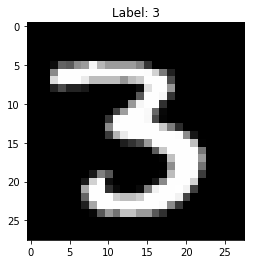

In [13]:
img_num = 12 # example of image 15 in validation set
curr_img = np.reshape(mnist.validation.images[img_num, :], (28, 28)) # 28 by 28 matrix 
plt.imshow(curr_img, cmap=plt.get_cmap('gray'))
label = mnist.validation.labels[img_num].tolist().index(1.0)
plt.title("Label: {}".format(label))

__Predict one single image with the trained model__

In [14]:
image_to_predict = mnist.validation.images[img_num].reshape(1,784)
print("Digit predicted: {}".format(sess.run(tf.argmax(Y, 1), feed_dict={X: image_to_predict})))

Digit predicted: [3]


__Predict my own images__

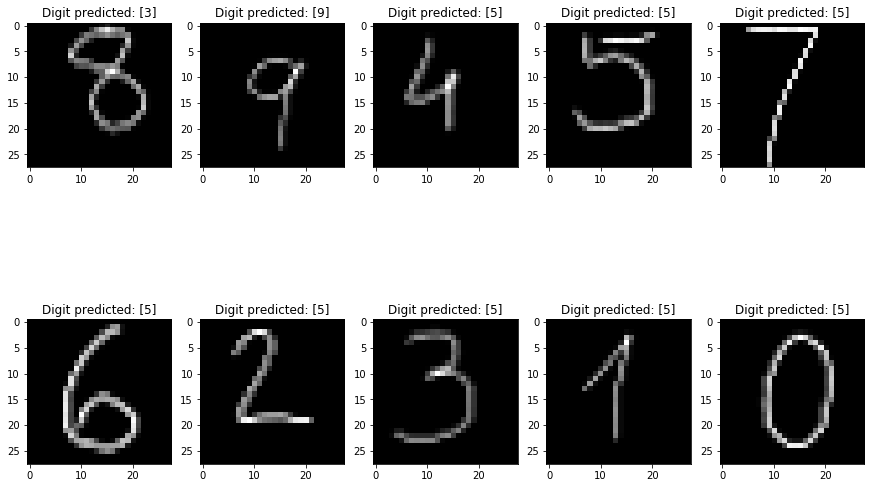

In [49]:
fig = plt.figure(figsize=(15, 10))
accuracies = []
path = "./my_numbers"
i = 1
for f in os.listdir(path):
    if ".png" in f and not "background" in f:
        fig.add_subplot(2,5,i)
        my_image = imageio.imread("{}/{}".format(path,f)) / 255.
        image_to_predict = my_image.reshape(1,784)
        plt.imshow(my_image, cmap=plt.get_cmap('gray'))#,ax=axes[i,j%2])
        i = i + 1
        pred_digit = sess.run(tf.argmax(Y, 1), feed_dict={X: image_to_predict})
        if pred_digit == int(f[0]):
            accuracies.append(1)
        else:
            accuracies.append(0)
        plt.title("Digit predicted: {}".format(pred_digit))

In [50]:
print("Final accuracy on MY test: {}%".format(np.array(accuracies).mean()*100))

Final accuracy on MY test: 20.0%


# 5 fully-connected layers<a class="anchor" id="5-fully"></a>

In [12]:
mnist = input_data.read_data_sets("data/", one_hot=True)

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz


In [2]:
# input X: 28x28 grayscale images, the first dimension (None) will index the images in the mini-batch
X = tf.placeholder(tf.float32, [None, 28, 28, 1])
# correct answers will go here
Y_ = tf.placeholder(tf.float32, [None, 10])
# variable learning rate
lr = tf.placeholder(tf.float32)
# Probability of keeping a node during dropout = 1.0 at test time (no dropout) and 0.75 at training time
pkeep = tf.placeholder(tf.float32)

# five layers and their number of neurons (tha last layer has 10 softmax neurons)
L = 200
M = 100
N = 60
O = 30
# Weights initialised with small random values between -0.2 and +0.2
# When using RELUs, make sure biases are initialised with small *positive* values for example 0.1 = tf.ones([K])/10
W1 = tf.Variable(tf.truncated_normal([784, L], stddev=0.1))  # 784 = 28 * 28
B1 = tf.Variable(tf.ones([L])/10)
W2 = tf.Variable(tf.truncated_normal([L, M], stddev=0.1))
B2 = tf.Variable(tf.ones([M])/10)
W3 = tf.Variable(tf.truncated_normal([M, N], stddev=0.1))
B3 = tf.Variable(tf.ones([N])/10)
W4 = tf.Variable(tf.truncated_normal([N, O], stddev=0.1))
B4 = tf.Variable(tf.ones([O])/10)
W5 = tf.Variable(tf.truncated_normal([O, 10], stddev=0.1))
B5 = tf.Variable(tf.zeros([10]))

In [3]:
# The model, with dropout at each layer
X = tf.reshape(X, [-1, 28*28])

Y1 = tf.nn.relu(tf.matmul(X, W1) + B1)
Y1d = tf.nn.dropout(Y1, pkeep)

Y2 = tf.nn.relu(tf.matmul(Y1d, W2) + B2)
Y2d = tf.nn.dropout(Y2, pkeep)

Y3 = tf.nn.relu(tf.matmul(Y2d, W3) + B3)
Y3d = tf.nn.dropout(Y3, pkeep)

Y4 = tf.nn.relu(tf.matmul(Y3d, W4) + B4)
Y4d = tf.nn.dropout(Y4, pkeep)

Ylogits = tf.matmul(Y4d, W5) + B5
Y = tf.nn.softmax(Ylogits)

In [6]:
# cross-entropy loss function (= -sum(Y_i * log(Yi)) ), normalised for batches of 100  images
# TensorFlow provides the softmax_cross_entropy_with_logits function to avoid numerical stability
# problems with log(0) which is NaN
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=Ylogits, labels=Y_)
cross_entropy = tf.reduce_mean(cross_entropy)*100

# accuracy of the trained model, between 0 (worst) and 1 (best)
correct_prediction = tf.equal(tf.argmax(Y, 1), tf.argmax(Y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [7]:
# training step, the learning rate is a placeholder
train_step = tf.train.AdamOptimizer(lr).minimize(cross_entropy)

# init
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [10]:
saver = tf.train.Saver()

In [11]:
saver.restore(sess, "./models/5fully.ckpt")

INFO:tensorflow:Restoring parameters from ./models/softmax.ckpt


In [8]:
# You can call this function in a loop to train the model, 100 images at a time
def training_step(i, update_test_data, update_train_data):

    # training on batches of 100 images with 100 labels
    batch_X, batch_Y = mnist.train.next_batch(100)

    # learning rate decay
    max_learning_rate = 0.003
    min_learning_rate = 0.0001
    decay_speed = 2000.0 # 0.003-0.0001-2000=>0.9826 done in 5000 iterations
    learning_rate = min_learning_rate + (max_learning_rate - min_learning_rate) * math.exp(-i/decay_speed)

    # compute training values for visualisation
    if update_train_data:
        a, c = sess.run([accuracy, cross_entropy], {X: batch_X, Y_: batch_Y, pkeep: 1.0})
        print(str(i) + ": accuracy:" + str(a) + " loss: " + str(c) + " (lr:" + str(learning_rate) + ")")

    # compute test values for visualisation
    if update_test_data:
        a,c = sess.run([accuracy, cross_entropy], {X: mnist.test.images, Y_: mnist.test.labels, pkeep: 1.0})
        print(str(i) + ": ********* epoch " + str(i*100//mnist.train.images.shape[0]+1) + " ********* test accuracy:" + str(a) + " test loss: " + str(c))

    # the backpropagation training step
    sess.run(train_step, {X: batch_X, Y_: batch_Y, pkeep: 0.75, lr: learning_rate})

In [13]:
for i in range(10000+1): training_step(i, i % 100 == 0, i % 20 == 0)

0: accuracy:0.02 loss: 231.07439 (lr:0.003)
0: ********* epoch 1 ********* test accuracy:0.0847 test loss: 231.02115
20: accuracy:0.5 loss: 141.97166 (lr:0.0029711445178725875)
40: accuracy:0.74 loss: 77.00842 (lr:0.0029425761525895904)
60: accuracy:0.77 loss: 67.15892 (lr:0.0029142920472906737)
80: accuracy:0.9 loss: 37.80195 (lr:0.0028862893735417373)
100: accuracy:0.83 loss: 45.57834 (lr:0.0028585653310520707)
100: ********* epoch 1 ********* test accuracy:0.8815 test loss: 39.91373
120: accuracy:0.89 loss: 30.574257 (lr:0.0028311171473943213)
140: accuracy:0.9 loss: 36.506523 (lr:0.0028039420777272502)
160: accuracy:0.94 loss: 29.199123 (lr:0.0027770374045212438)
180: accuracy:0.9 loss: 23.563896 (lr:0.0027504004372865616)
200: accuracy:0.96 loss: 25.217577 (lr:0.0027240285123042826)
200: ********* epoch 1 ********* test accuracy:0.9286 test loss: 25.246372
220: accuracy:0.95 loss: 15.9253645 (lr:0.0026979189923599317)
240: accuracy:0.92 loss: 30.066607 (lr:0.0026720692664797567)
2

2140: accuracy:0.98 loss: 12.519903 (lr:0.0010947247005142493)
2160: accuracy:0.95 loss: 8.580658 (lr:0.0010848270243703235)
2180: accuracy:0.96 loss: 17.062113 (lr:0.0010750278317495266)
2200: accuracy:0.98 loss: 6.506391 (lr:0.0010653261427244307)
2200: ********* epoch 5 ********* test accuracy:0.9743 test loss: 10.083603
2220: accuracy:0.99 loss: 1.8567109 (lr:0.0010557209871180483)
2240: accuracy:0.97 loss: 7.2240405 (lr:0.0010462114044068145)
2260: accuracy:0.98 loss: 4.7318125 (lr:0.0010367964436245336)
2280: accuracy:0.97 loss: 11.907484 (lr:0.0010274751632672816)
2300: accuracy:0.97 loss: 6.8597546 (lr:0.0010182466311992545)
2300: ********* epoch 5 ********* test accuracy:0.9739 test loss: 10.515323
2320: accuracy:1.0 loss: 0.40643317 (lr:0.0010091099245595554)
2340: accuracy:1.0 loss: 1.4316158 (lr:0.0010000641296699067)
2360: accuracy:0.96 loss: 14.89926 (lr:0.0009911083419432806)
2380: accuracy:0.98 loss: 1.7324791 (lr:0.0009822416657934419)
2400: accuracy:1.0 loss: 3.600150

4280: accuracy:1.0 loss: 0.25234136 (lr:0.0004411990447631597)
4300: accuracy:1.0 loss: 0.25059986 (lr:0.00043780405754314123)
4300: ********* epoch 8 ********* test accuracy:0.9781 test loss: 9.19205
4320: accuracy:0.99 loss: 6.6327424 (lr:0.0004344428510103813)
4340: accuracy:0.99 loss: 1.309685 (lr:0.00043111508904142585)
4360: accuracy:1.0 loss: 0.28260756 (lr:0.0004278204388573046)
4380: accuracy:0.98 loss: 8.2568 (lr:0.0004245585709902538)
4400: accuracy:0.99 loss: 1.690528 (lr:0.00042132915925076824)
4400: ********* epoch 9 ********* test accuracy:0.9783 test loss: 8.857712
4420: accuracy:0.99 loss: 2.2764497 (lr:0.0004181318806949831)
4440: accuracy:1.0 loss: 0.20662042 (lr:0.0004149664155923781)
4460: accuracy:1.0 loss: 1.4025831 (lr:0.0004118324473938054)
4480: accuracy:0.98 loss: 6.971101 (lr:0.00040872966269983314)
4500: accuracy:0.99 loss: 4.6621237 (lr:0.00040565775122940656)
4500: ********* epoch 9 ********* test accuracy:0.9784 test loss: 9.039295
4520: accuracy:1.0 los

6400: accuracy:1.0 loss: 1.1351105 (lr:0.00021821039153726202)
6400: ********* epoch 12 ********* test accuracy:0.9789 test loss: 9.191084
6420: accuracy:0.99 loss: 2.576704 (lr:0.00021703417848889034)
6440: accuracy:0.99 loss: 1.6828574 (lr:0.0002158696689558963)
6460: accuracy:0.98 loss: 2.0691512 (lr:0.0002147167464863563)
6480: accuracy:1.0 loss: 0.22343405 (lr:0.00021357529578706251)
6500: accuracy:1.0 loss: 1.3478051 (lr:0.00021244520271199385)
6500: ********* epoch 12 ********* test accuracy:0.9804 test loss: 8.973635
6520: accuracy:1.0 loss: 0.54129374 (lr:0.00021132635425090104)
6540: accuracy:0.99 loss: 3.078141 (lr:0.00021021863851800553)
6560: accuracy:1.0 loss: 1.2209787 (lr:0.00020912194474081107)
6580: accuracy:1.0 loss: 0.87542087 (lr:0.00020803616324902585)
6600: accuracy:1.0 loss: 0.33372107 (lr:0.00020696118546359606)
6600: ********* epoch 13 ********* test accuracy:0.9794 test loss: 8.855592
6620: accuracy:1.0 loss: 0.3084064 (lr:0.00020589690388584717)
6640: accura

8500: accuracy:1.0 loss: 0.07917267 (lr:0.00014136627833609785)
8500: ********* epoch 16 ********* test accuracy:0.9812 test loss: 8.948842
8520: accuracy:1.0 loss: 0.27450666 (lr:0.00014095467698947548)
8540: accuracy:1.0 loss: 0.28625232 (lr:0.0001405471711446811)
8560: accuracy:1.0 loss: 0.106536664 (lr:0.00014014372005079055)
8580: accuracy:1.0 loss: 0.06506689 (lr:0.00013974428336235834)
8600: accuracy:1.0 loss: 0.2148379 (lr:0.00013934882113538272)
8600: ********* epoch 16 ********* test accuracy:0.9806 test loss: 9.154215
8620: accuracy:1.0 loss: 0.14013249 (lr:0.00013895729382331143)
8640: accuracy:1.0 loss: 0.03177356 (lr:0.00013856966227308694)
8660: accuracy:0.99 loss: 2.1599412 (lr:0.0001381858877212313)
8680: accuracy:0.99 loss: 3.0185523 (lr:0.00013780593178996944)
8700: accuracy:0.99 loss: 3.7837467 (lr:0.00013742975648339164)
8700: ********* epoch 16 ********* test accuracy:0.9807 test loss: 9.149341
8720: accuracy:1.0 loss: 0.19801189 (lr:0.00013705732418365372)
8740: 

In [14]:
save_path = saver.save(sess, "./models/5fully.ckpt")

Evaluate the model

In [17]:
#a_test = sess.run([accuracy], feed_dict={XX: mnist.test.images, Y_: mnist.test.labels})
a = sess.run([accuracy], {X: mnist.test.images, Y_: mnist.test.labels, pkeep: 1.0})
print("Final accuracy on test: {}%".format(a[0]*100))

Final accuracy on test: 98.03000092506409%


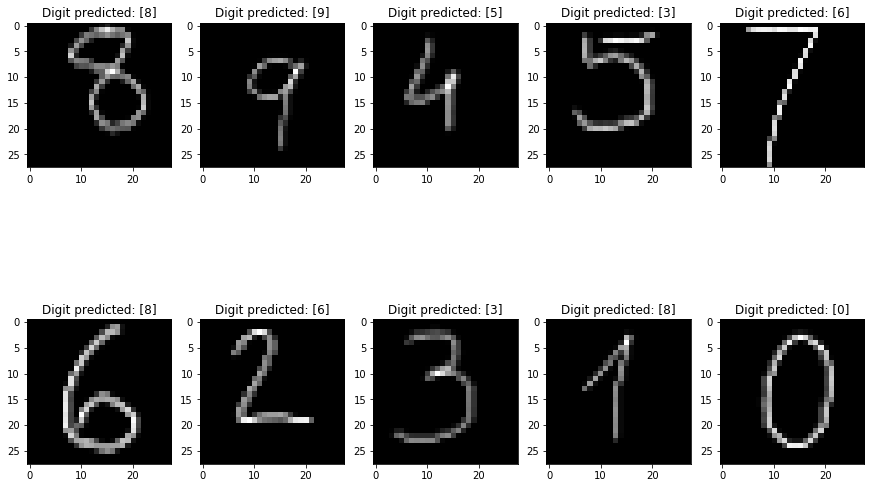

In [24]:
fig = plt.figure(figsize=(15, 10))
accuracies = []
path = "./my_numbers"
i = 1
for f in os.listdir(path):
    if ".png" in f and not "background" in f:
        fig.add_subplot(2,5,i)
        my_image = imageio.imread("{}/{}".format(path,f)) / 255.
        image_to_predict = my_image.reshape(1,784)
        plt.imshow(my_image, cmap=plt.get_cmap('gray'))
        i += 1
        pred_digit = sess.run(tf.argmax(Y, 1), feed_dict={X: image_to_predict, pkeep:1.0})
        if pred_digit == int(f[0]):
            accuracies.append(1)
        else:
            accuracies.append(0)
        plt.title("Digit predicted: {}".format(pred_digit))

In [25]:
print("Final accuracy on MY test: {}%".format(np.array(accuracies).mean()*100))

Final accuracy on MY test: 40.0%


# Convolutional <a class="anchor" id="convolutional"></a>

In [2]:
mnist = input_data.read_data_sets("data", one_hot=True, reshape=False, validation_size=0)

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz


In [3]:
# input X: 28x28 grayscale images, the first dimension (None) will index the images in the mini-batch
X = tf.placeholder(tf.float32, [None, 28, 28, 1])
# correct answers will go here
Y_ = tf.placeholder(tf.float32, [None, 10])
# variable learning rate
lr = tf.placeholder(tf.float32)
# Probability of keeping a node during dropout = 1.0 at test time (no dropout) and 0.75 at training time
pkeep = tf.placeholder(tf.float32)

# three convolutional layers with their channel counts, and a
# fully connected layer (the last layer has 10 softmax neurons)
K = 6  # first convolutional layer output depth
L = 12  # second convolutional layer output depth
M = 24  # third convolutional layer
N = 200  # fully connected layer

In [4]:
W1 = tf.Variable(tf.truncated_normal([6, 6, 1, K], stddev=0.1))  # 6x6 patch, 1 input channel, K output channels
B1 = tf.Variable(tf.constant(0.1, tf.float32, [K]))
W2 = tf.Variable(tf.truncated_normal([5, 5, K, L], stddev=0.1))
B2 = tf.Variable(tf.constant(0.1, tf.float32, [L]))
W3 = tf.Variable(tf.truncated_normal([4, 4, L, M], stddev=0.1))
B3 = tf.Variable(tf.constant(0.1, tf.float32, [M]))

W4 = tf.Variable(tf.truncated_normal([7 * 7 * M, N], stddev=0.1))
B4 = tf.Variable(tf.constant(0.1, tf.float32, [N]))
W5 = tf.Variable(tf.truncated_normal([N, 10], stddev=0.1))
B5 = tf.Variable(tf.constant(0.1, tf.float32, [10]))

In [5]:
# The model
stride = 1  # output is 28x28
Y1 = tf.nn.relu(tf.nn.conv2d(X, W1, strides=[1, stride, stride, 1], padding='SAME') + B1)
stride = 2  # output is 14x14
Y2 = tf.nn.relu(tf.nn.conv2d(Y1, W2, strides=[1, stride, stride, 1], padding='SAME') + B2)
stride = 2  # output is 7x7
Y3 = tf.nn.relu(tf.nn.conv2d(Y2, W3, strides=[1, stride, stride, 1], padding='SAME') + B3)

# reshape the output from the third convolution for the fully connected layer
YY = tf.reshape(Y3, shape=[-1, 7 * 7 * M])

Y4 = tf.nn.relu(tf.matmul(YY, W4) + B4)
YY4 = tf.nn.dropout(Y4, pkeep)
Ylogits = tf.matmul(YY4, W5) + B5
Y = tf.nn.softmax(Ylogits)

In [7]:
# cross-entropy loss function (= -sum(Y_i * log(Yi)) ), normalised for batches of 100  images
# TensorFlow provides the softmax_cross_entropy_with_logits function to avoid numerical stability
# problems with log(0) which is NaN
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=Ylogits, labels=Y_)
cross_entropy = tf.reduce_mean(cross_entropy)*100

# accuracy of the trained model, between 0 (worst) and 1 (best)
correct_prediction = tf.equal(tf.argmax(Y, 1), tf.argmax(Y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [8]:
# training step, the learning rate is a placeholder
train_step = tf.train.AdamOptimizer(lr).minimize(cross_entropy)

# init
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [10]:
saver = tf.train.Saver()

In [11]:
saver.restore(sess, "./models/convolutional.ckpt")

INFO:tensorflow:Restoring parameters from ./models/softmax.ckpt


In [9]:
# You can call this function in a loop to train the model, 100 images at a time
def training_step(i, update_test_data, update_train_data):

    # training on batches of 100 images with 100 labels
    batch_X, batch_Y = mnist.train.next_batch(100)

    # learning rate decay
    max_learning_rate = 0.003
    min_learning_rate = 0.0001
    decay_speed = 2000.0
    learning_rate = min_learning_rate + (max_learning_rate - min_learning_rate) * math.exp(-i/decay_speed)

    # compute training values for visualisation
    if update_train_data:
        a, c = sess.run([accuracy, cross_entropy], {X: batch_X, Y_: batch_Y, pkeep: 1.0})
        print(str(i) + ": accuracy:" + str(a) + " loss: " + str(c) + " (lr:" + str(learning_rate) + ")")

    # compute test values for visualisation
    if update_test_data:
        a, c = sess.run([accuracy, cross_entropy], {X: mnist.test.images, Y_: mnist.test.labels, pkeep: 1.0})
        print(str(i) + ": ********* epoch " + str(i*100//mnist.train.images.shape[0]+1) + " ********* test accuracy:" + str(a) + " test loss: " + str(c))

    # the backpropagation training step
    sess.run(train_step, {X: batch_X, Y_: batch_Y, lr: learning_rate, pkeep: 0.75})

In [11]:
for i in range(10000+1): training_step(i, i % 100 == 0, i % 20 == 0)

0: accuracy:0.11 loss: 236.76479 (lr:0.003)
0: ********* epoch 1 ********* test accuracy:0.1111 test loss: 240.81676
20: accuracy:0.82 loss: 54.119156 (lr:0.0029711445178725875)
40: accuracy:0.97 loss: 24.165352 (lr:0.0029425761525895904)
60: accuracy:0.89 loss: 41.671867 (lr:0.0029142920472906737)
80: accuracy:0.97 loss: 10.037586 (lr:0.0028862893735417373)
100: accuracy:0.95 loss: 14.444302 (lr:0.0028585653310520707)
100: ********* epoch 1 ********* test accuracy:0.9351 test loss: 21.1299
120: accuracy:0.92 loss: 26.943981 (lr:0.0028311171473943213)
140: accuracy:0.96 loss: 11.459386 (lr:0.0028039420777272502)
160: accuracy:0.95 loss: 10.540141 (lr:0.0027770374045212438)
180: accuracy:0.99 loss: 4.400164 (lr:0.0027504004372865616)
200: accuracy:0.98 loss: 6.0461326 (lr:0.0027240285123042826)
200: ********* epoch 1 ********* test accuracy:0.9682 test loss: 10.207595
220: accuracy:0.98 loss: 13.145924 (lr:0.0026979189923599317)
240: accuracy:0.99 loss: 9.247763 (lr:0.002672069266479756

2140: accuracy:0.99 loss: 0.8521933 (lr:0.0010947247005142493)
2160: accuracy:1.0 loss: 1.0237055 (lr:0.0010848270243703235)
2180: accuracy:0.98 loss: 2.9910471 (lr:0.0010750278317495266)
2200: accuracy:1.0 loss: 0.7949995 (lr:0.0010653261427244307)
2200: ********* epoch 4 ********* test accuracy:0.9879 test loss: 3.4503944
2220: accuracy:1.0 loss: 0.78839695 (lr:0.0010557209871180483)
2240: accuracy:0.98 loss: 3.8218803 (lr:0.0010462114044068145)
2260: accuracy:1.0 loss: 1.1979021 (lr:0.0010367964436245336)
2280: accuracy:1.0 loss: 0.9583591 (lr:0.0010274751632672816)
2300: accuracy:1.0 loss: 0.29915977 (lr:0.0010182466311992545)
2300: ********* epoch 4 ********* test accuracy:0.99 test loss: 2.9436145
2320: accuracy:1.0 loss: 0.76281786 (lr:0.0010091099245595554)
2340: accuracy:1.0 loss: 0.70911324 (lr:0.0010000641296699067)
2360: accuracy:0.98 loss: 3.0241354 (lr:0.0009911083419432806)
2380: accuracy:1.0 loss: 1.4572712 (lr:0.0009822416657934419)
2400: accuracy:0.99 loss: 2.2568774 

4260: accuracy:1.0 loss: 0.13231006 (lr:0.00044462815217198804)
4280: accuracy:1.0 loss: 0.99732465 (lr:0.0004411990447631597)
4300: accuracy:1.0 loss: 0.027786758 (lr:0.00043780405754314123)
4300: ********* epoch 8 ********* test accuracy:0.9911 test loss: 2.7585204
4320: accuracy:1.0 loss: 0.15198343 (lr:0.0004344428510103813)
4340: accuracy:1.0 loss: 0.015878966 (lr:0.00043111508904142585)
4360: accuracy:1.0 loss: 0.24730907 (lr:0.0004278204388573046)
4380: accuracy:1.0 loss: 0.05814009 (lr:0.0004245585709902538)
4400: accuracy:1.0 loss: 0.05998175 (lr:0.00042132915925076824)
4400: ********* epoch 8 ********* test accuracy:0.9916 test loss: 2.61479
4420: accuracy:1.0 loss: 0.5599988 (lr:0.0004181318806949831)
4440: accuracy:1.0 loss: 0.052921124 (lr:0.0004149664155923781)
4460: accuracy:1.0 loss: 0.035141233 (lr:0.0004118324473938054)
4480: accuracy:1.0 loss: 0.31213737 (lr:0.00040872966269983314)
4500: accuracy:1.0 loss: 0.5095071 (lr:0.00040565775122940656)
4500: ********* epoch 8

6340: accuracy:1.0 loss: 0.055691775 (lr:0.0002218104339199921)
6360: accuracy:1.0 loss: 0.00083511893 (lr:0.00022059839985140217)
6380: accuracy:1.0 loss: 0.11226384 (lr:0.00021939842572329645)
6400: accuracy:1.0 loss: 0.010853732 (lr:0.00021821039153726202)
6400: ********* epoch 11 ********* test accuracy:0.9917 test loss: 2.88313
6420: accuracy:0.99 loss: 0.86397517 (lr:0.00021703417848889034)
6440: accuracy:1.0 loss: 0.034843214 (lr:0.0002158696689558963)
6460: accuracy:1.0 loss: 0.0055690226 (lr:0.0002147167464863563)
6480: accuracy:1.0 loss: 0.025461346 (lr:0.00021357529578706251)
6500: accuracy:1.0 loss: 0.029829962 (lr:0.00021244520271199385)
6500: ********* epoch 11 ********* test accuracy:0.9912 test loss: 2.9320662
6520: accuracy:1.0 loss: 0.03409944 (lr:0.00021132635425090104)
6540: accuracy:1.0 loss: 0.018571354 (lr:0.00021021863851800553)
6560: accuracy:1.0 loss: 0.00826151 (lr:0.00020912194474081107)
6580: accuracy:1.0 loss: 0.03077168 (lr:0.00020803616324902585)
6600: a

8400: ********* epoch 15 ********* test accuracy:0.9912 test loss: 3.1268172
8420: accuracy:1.0 loss: 0.0042728586 (lr:0.0001430544681804518)
8440: accuracy:1.0 loss: 0.008543361 (lr:0.00014262606906421518)
8460: accuracy:1.0 loss: 0.008032041 (lr:0.00014220193259040676)
8480: accuracy:1.0 loss: 0.030506292 (lr:0.00014178201634502583)
8500: accuracy:1.0 loss: 0.015600504 (lr:0.00014136627833609785)
8500: ********* epoch 15 ********* test accuracy:0.9908 test loss: 3.053355
8520: accuracy:1.0 loss: 0.13219771 (lr:0.00014095467698947548)
8540: accuracy:1.0 loss: 0.0072347126 (lr:0.0001405471711446811)
8560: accuracy:1.0 loss: 0.00052329525 (lr:0.00014014372005079055)
8580: accuracy:1.0 loss: 0.014460847 (lr:0.00013974428336235834)
8600: accuracy:1.0 loss: 0.34351498 (lr:0.00013934882113538272)
8600: ********* epoch 15 ********* test accuracy:0.9911 test loss: 2.935643
8620: accuracy:1.0 loss: 0.011324741 (lr:0.00013895729382331143)
8640: accuracy:1.0 loss: 0.0010937094 (lr:0.000138569662

In [12]:
save_path = saver.save(sess, "./models/convolutional.ckpt")

In [14]:
a = sess.run([accuracy], {X: mnist.test.images, Y_: mnist.test.labels, pkeep: 1.0})
print("Final accuracy on test: {}%".format(a[0]*100))

Final accuracy on test: 99.12999868392944%


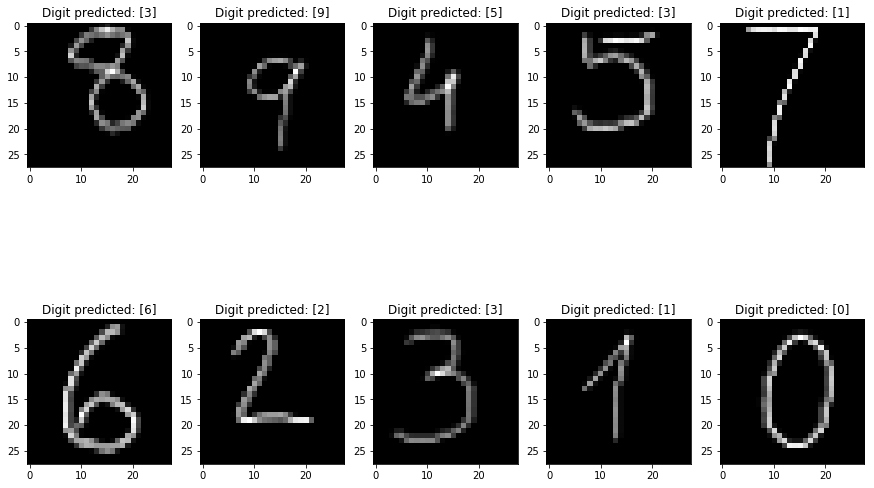

In [15]:
fig = plt.figure(figsize=(15, 10))
accuracies = []
path = "./my_numbers"
i = 1
for f in os.listdir(path):
    if ".png" in f and not "background" in f:
        fig.add_subplot(2,5,i)
        my_image = imageio.imread("{}/{}".format(path,f))
        image_to_predict = my_image / 255. # All images in the training set have an range from 0-1 and not from 0-255
        plt.imshow(image_to_predict, cmap=plt.get_cmap('gray'))
        i += 1
        pred_digit = sess.run(tf.argmax(Y, 1), feed_dict={X: [image_to_predict.reshape(28,28,1)], pkeep:1.0})
        if pred_digit == int(f[0]):
            accuracies.append(1)
        else:
            accuracies.append(0)
        plt.title("Digit predicted: {}".format(pred_digit))

In [16]:
print("Final accuracy on MY test: {}%".format(np.array(accuracies).mean()*100))

Final accuracy on MY test: 60.0%


# Convolutional Batch Normalization <a class="anchor" id="convolutional_batch"></a>

In [2]:
# Download images and labels into mnist.test (10K images+labels) and mnist.train (60K images+labels)
mnist = input_data.read_data_sets("data", one_hot=True, reshape=False, validation_size=0)

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz


In [3]:
# neural network structure for this sample:
#
# · · · · · · · · · ·      (input data, 1-deep)                    X [batch, 28, 28, 1]
# @ @ @ @ @ @ @ @ @ @   -- conv. layer +BN 6x6x1=>24 stride 1      W1 [5, 5, 1, 24]        B1 [24]
# ∶∶∶∶∶∶∶∶∶∶∶∶∶∶∶∶∶∶∶                                              Y1 [batch, 28, 28, 6]
#   @ @ @ @ @ @ @ @     -- conv. layer +BN 5x5x6=>48 stride 2      W2 [5, 5, 6, 48]        B2 [48]
#   ∶∶∶∶∶∶∶∶∶∶∶∶∶∶∶                                                Y2 [batch, 14, 14, 12]
#     @ @ @ @ @ @       -- conv. layer +BN 4x4x12=>64 stride 2     W3 [4, 4, 12, 64]       B3 [64]
#     ∶∶∶∶∶∶∶∶∶∶∶                                                  Y3 [batch, 7, 7, 24] => reshaped to YY [batch, 7*7*24]
#      \x/x\x\x/ ✞      -- fully connected layer (relu+dropout+BN) W4 [7*7*24, 200]       B4 [200]
#       · · · ·                                                    Y4 [batch, 200]
#       \x/x\x/         -- fully connected layer (softmax)         W5 [200, 10]           B5 [10]
#        · · ·                                                     Y [batch, 10]

In [4]:
# input X: 28x28 grayscale images, the first dimension (None) will index the images in the mini-batch
X = tf.placeholder(tf.float32, [None, 28, 28, 1])
# correct answers will go here
Y_ = tf.placeholder(tf.float32, [None, 10])
# variable learning rate
lr = tf.placeholder(tf.float32)
# test flag for batch norm
tst = tf.placeholder(tf.bool)
iter = tf.placeholder(tf.int32)
# dropout probability
pkeep = tf.placeholder(tf.float32)
pkeep_conv = tf.placeholder(tf.float32)

In [5]:
def batchnorm(Ylogits, is_test, iteration, offset, convolutional=False):
    exp_moving_avg = tf.train.ExponentialMovingAverage(0.999, iteration) # adding the iteration prevents from averaging across non-existing iterations
    bnepsilon = 1e-5
    if convolutional:
        mean, variance = tf.nn.moments(Ylogits, [0, 1, 2])
    else:
        mean, variance = tf.nn.moments(Ylogits, [0])
    update_moving_averages = exp_moving_avg.apply([mean, variance])
    m = tf.cond(is_test, lambda: exp_moving_avg.average(mean), lambda: mean)
    v = tf.cond(is_test, lambda: exp_moving_avg.average(variance), lambda: variance)
    Ybn = tf.nn.batch_normalization(Ylogits, m, v, offset, None, bnepsilon)
    return Ybn, update_moving_averages

def no_batchnorm(Ylogits, is_test, iteration, offset, convolutional=False):
    return Ylogits, tf.no_op()

def compatible_convolutional_noise_shape(Y):
    noiseshape = tf.shape(Y)
    noiseshape = noiseshape * tf.constant([1,0,0,1]) + tf.constant([0,1,1,0])
    return noiseshape

In [6]:
# three convolutional layers with their channel counts, and a
# fully connected layer (tha last layer has 10 softmax neurons)
K = 24  # first convolutional layer output depth
L = 48  # second convolutional layer output depth
M = 64  # third convolutional layer
N = 200  # fully connected layer

W1 = tf.Variable(tf.truncated_normal([6, 6, 1, K], stddev=0.1))  # 6x6 patch, 1 input channel, K output channels
B1 = tf.Variable(tf.constant(0.1, tf.float32, [K]))
W2 = tf.Variable(tf.truncated_normal([5, 5, K, L], stddev=0.1))
B2 = tf.Variable(tf.constant(0.1, tf.float32, [L]))
W3 = tf.Variable(tf.truncated_normal([4, 4, L, M], stddev=0.1))
B3 = tf.Variable(tf.constant(0.1, tf.float32, [M]))

W4 = tf.Variable(tf.truncated_normal([7 * 7 * M, N], stddev=0.1))
B4 = tf.Variable(tf.constant(0.1, tf.float32, [N]))
W5 = tf.Variable(tf.truncated_normal([N, 10], stddev=0.1))
B5 = tf.Variable(tf.constant(0.1, tf.float32, [10]))

In [7]:
# The model
# batch norm scaling is not useful with relus
# batch norm offsets are used instead of biases
stride = 1  # output is 28x28
Y1l = tf.nn.conv2d(X, W1, strides=[1, stride, stride, 1], padding='SAME')
Y1bn, update_ema1 = batchnorm(Y1l, tst, iter, B1, convolutional=True)
Y1r = tf.nn.relu(Y1bn)
Y1 = tf.nn.dropout(Y1r, pkeep_conv, compatible_convolutional_noise_shape(Y1r))
stride = 2  # output is 14x14
Y2l = tf.nn.conv2d(Y1, W2, strides=[1, stride, stride, 1], padding='SAME')
Y2bn, update_ema2 = batchnorm(Y2l, tst, iter, B2, convolutional=True)
Y2r = tf.nn.relu(Y2bn)
Y2 = tf.nn.dropout(Y2r, pkeep_conv, compatible_convolutional_noise_shape(Y2r))
stride = 2  # output is 7x7
Y3l = tf.nn.conv2d(Y2, W3, strides=[1, stride, stride, 1], padding='SAME')
Y3bn, update_ema3 = batchnorm(Y3l, tst, iter, B3, convolutional=True)
Y3r = tf.nn.relu(Y3bn)
Y3 = tf.nn.dropout(Y3r, pkeep_conv, compatible_convolutional_noise_shape(Y3r))

# reshape the output from the third convolution for the fully connected layer
YY = tf.reshape(Y3, shape=[-1, 7 * 7 * M])

Y4l = tf.matmul(YY, W4)
Y4bn, update_ema4 = batchnorm(Y4l, tst, iter, B4)
Y4r = tf.nn.relu(Y4bn)
Y4 = tf.nn.dropout(Y4r, pkeep)
Ylogits = tf.matmul(Y4, W5) + B5
Y = tf.nn.softmax(Ylogits)

update_ema = tf.group(update_ema1, update_ema2, update_ema3, update_ema4)

In [9]:
# cross-entropy loss function (= -sum(Y_i * log(Yi)) ), normalised for batches of 100  images
# TensorFlow provides the softmax_cross_entropy_with_logits function to avoid numerical stability
# problems with log(0) which is NaN
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=Ylogits, labels=Y_)
cross_entropy = tf.reduce_mean(cross_entropy)*100

# accuracy of the trained model, between 0 (worst) and 1 (best)
correct_prediction = tf.equal(tf.argmax(Y, 1), tf.argmax(Y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [10]:
# training step, the learning rate is a placeholder
train_step = tf.train.AdamOptimizer(lr).minimize(cross_entropy)

# init
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [12]:
saver = tf.train.Saver()

In [11]:
saver.restore(sess, "./models/convolutional_batch.ckpt")

INFO:tensorflow:Restoring parameters from ./models/softmax.ckpt


In [11]:
# You can call this function in a loop to train the model, 100 images at a time
def training_step(i, update_test_data, update_train_data):

    # training on batches of 100 images with 100 labels
    batch_X, batch_Y = mnist.train.next_batch(100)

    # learning rate decay
    max_learning_rate = 0.02
    min_learning_rate = 0.0001
    decay_speed = 1600
    learning_rate = min_learning_rate + (max_learning_rate - min_learning_rate) * math.exp(-i/decay_speed)

    # compute training values for visualisation
    if update_train_data:
        a, c = sess.run([accuracy, cross_entropy], {X: batch_X, Y_: batch_Y, tst: False, pkeep: 1.0, pkeep_conv: 1.0})
        print(str(i) + ": accuracy:" + str(a) + " loss: " + str(c) + " (lr:" + str(learning_rate) + ")")

    # compute test values for visualisation
    if update_test_data:
        a, c = sess.run([accuracy, cross_entropy], {X: mnist.test.images, Y_: mnist.test.labels, tst: True, pkeep: 1.0, pkeep_conv: 1.0})
        print(str(i) + ": ********* epoch " + str(i*100//mnist.train.images.shape[0]+1) + " ********* test accuracy:" + str(a) + " test loss: " + str(c))
        
    # the backpropagation training step
    sess.run(train_step, {X: batch_X, Y_: batch_Y, lr: learning_rate, tst: False, pkeep: 0.75, pkeep_conv: 1.0})
    sess.run(update_ema, {X: batch_X, Y_: batch_Y, tst: False, iter: i, pkeep: 1.0, pkeep_conv: 1.0})


In [13]:
for i in range(10000+1): training_step(i, i % 100 == 0, i % 20 == 0)

0: accuracy:0.06 loss: 292.432 (lr:0.02)
0: ********* epoch 1 ********* test accuracy:0.1201 test loss: 1648134800000.0
20: accuracy:0.88 loss: 38.87883 (lr:0.019752798229828242)
40: accuracy:0.94 loss: 19.802286 (lr:0.019508667249363818)
60: accuracy:0.93 loss: 24.654058 (lr:0.019267568912644355)
80: accuracy:0.97 loss: 10.256001 (lr:0.019029465547564208)
100: accuracy:0.97 loss: 9.82656 (lr:0.01879431994998817)
100: ********* epoch 1 ********* test accuracy:0.9476 test loss: 15.537366
120: accuracy:0.97 loss: 9.625422 (lr:0.018562095377938202)
140: accuracy:0.99 loss: 9.3619795 (lr:0.018332755545852467)
160: accuracy:0.99 loss: 5.5987206 (lr:0.018106264618915596)
180: accuracy:0.98 loss: 3.9288883 (lr:0.01788258720745946)
200: accuracy:0.94 loss: 16.622255 (lr:0.01766168836143345)
200: ********* epoch 1 ********* test accuracy:0.9759 test loss: 7.1529465
220: accuracy:0.97 loss: 9.981112 (lr:0.01744353356494344)
240: accuracy:0.96 loss: 10.74816 (lr:0.01722808873085865)
260: accuracy

2160: accuracy:1.0 loss: 0.8001811 (lr:0.005258881186853241)
2180: accuracy:1.0 loss: 0.05712881 (lr:0.005194796535521788)
2200: accuracy:0.98 loss: 7.0255904 (lr:0.005131507956514455)
2200: ********* epoch 4 ********* test accuracy:0.9929 test loss: 2.2782192
2220: accuracy:1.0 loss: 0.3600181 (lr:0.00506900556086201)
2240: accuracy:0.99 loss: 4.0476756 (lr:0.005007279582437969)
2260: accuracy:0.99 loss: 1.1586498 (lr:0.004946320376432622)
2280: accuracy:1.0 loss: 0.95899755 (lr:0.004886118417846009)
2300: accuracy:1.0 loss: 0.42876798 (lr:0.004826664299999618)
2300: ********* epoch 4 ********* test accuracy:0.9943 test loss: 1.755179
2320: accuracy:0.99 loss: 5.8590813 (lr:0.004767948733066574)
2340: accuracy:1.0 loss: 0.34280628 (lr:0.004709962542620088)
2360: accuracy:1.0 loss: 0.5601392 (lr:0.004652696668199926)
2380: accuracy:1.0 loss: 0.96389556 (lr:0.004596142161896706)
2400: accuracy:1.0 loss: 0.23183702 (lr:0.0045402901869537535)
2400: ********* epoch 5 ********* test accurac

4280: accuracy:1.0 loss: 0.02404198 (lr:0.0014712458850537856)
4300: accuracy:1.0 loss: 0.19558042 (lr:0.001454211995097703)
4300: ********* epoch 8 ********* test accuracy:0.9955 test loss: 1.6219245
4320: accuracy:1.0 loss: 0.0069448464 (lr:0.0014373897035210204)
4340: accuracy:1.0 loss: 0.24212538 (lr:0.0014207763818064535)
4360: accuracy:1.0 loss: 0.04866544 (lr:0.0014043694340886844)
4380: accuracy:1.0 loss: 0.19342738 (lr:0.001388166296748752)
4400: accuracy:1.0 loss: 0.13952175 (lr:0.0013721644380134807)
4400: ********* epoch 8 ********* test accuracy:0.9945 test loss: 1.7693914
4420: accuracy:1.0 loss: 0.03594224 (lr:0.0013563613575598879)
4440: accuracy:1.0 loss: 0.039502118 (lr:0.0013407545861245014)
4460: accuracy:1.0 loss: 0.19379224 (lr:0.0013253416851175311)
4480: accuracy:1.0 loss: 0.14283228 (lr:0.0013101202462418378)
4500: accuracy:0.99 loss: 1.6585131 (lr:0.0012950878911166283)
4500: ********* epoch 8 ********* test accuracy:0.9936 test loss: 1.9278662
4520: accuracy:

6380: accuracy:1.0 loss: 0.06227933 (lr:0.0004690658231721445)
6400: accuracy:1.0 loss: 0.051676713 (lr:0.00046448121388581015)
6400: ********* epoch 11 ********* test accuracy:0.9957 test loss: 1.5662137
6420: accuracy:1.0 loss: 0.031371795 (lr:0.0004599535555306883)
6440: accuracy:1.0 loss: 0.06447873 (lr:0.0004554821406509493)
6460: accuracy:1.0 loss: 0.042849828 (lr:0.0004510662705789214)
6480: accuracy:1.0 loss: 0.059774064 (lr:0.00044670525532592093)
6500: accuracy:1.0 loss: 0.019953646 (lr:0.00044239841347444255)
6500: ********* epoch 11 ********* test accuracy:0.9957 test loss: 1.5644871
6520: accuracy:1.0 loss: 0.022160338 (lr:0.0004381450720716844)
6540: accuracy:1.0 loss: 0.034057807 (lr:0.0004339445665243991)
6560: accuracy:1.0 loss: 0.026971944 (lr:0.000429796240495049)
6580: accuracy:1.0 loss: 0.037363876 (lr:0.0004256994457992515)
6600: accuracy:1.0 loss: 0.00554398 (lr:0.0004216535423045009)
6600: ********* epoch 12 ********* test accuracy:0.9954 test loss: 1.539212
662

8440: accuracy:1.0 loss: 0.09806551 (lr:0.00020184733849462578)
8460: accuracy:1.0 loss: 0.00222424 (lr:0.0002005821705366784)
8480: accuracy:1.0 loss: 0.015149001 (lr:0.0001993327187475133)
8500: accuracy:1.0 loss: 0.057001766 (lr:0.00019809878789774654)
8500: ********* epoch 15 ********* test accuracy:0.9955 test loss: 1.5761269
8520: accuracy:1.0 loss: 0.0103063425 (lr:0.0001968801851831723)
8540: accuracy:1.0 loss: 0.06786843 (lr:0.0001956767201946372)
8560: accuracy:1.0 loss: 0.024988785 (lr:0.0001944882048882884)
8580: accuracy:1.0 loss: 0.011789942 (lr:0.00019331445355619107)
8600: accuracy:1.0 loss: 0.007928359 (lr:0.00019215528279731162)
8600: ********* epoch 15 ********* test accuracy:0.9954 test loss: 1.5841141
8620: accuracy:1.0 loss: 0.026999403 (lr:0.0001910105114888606)
8640: accuracy:1.0 loss: 0.047276437 (lr:0.00018987996075799205)
8660: accuracy:1.0 loss: 0.027084906 (lr:0.00018876345395385424)
8680: accuracy:1.0 loss: 0.037340607 (lr:0.0001876608166199873)
8700: accu

In [17]:
save_path = saver.save(sess, "./models/convolutional_batch.ckpt")

In [16]:
a = sess.run([accuracy], {X: mnist.test.images, Y_: mnist.test.labels, tst: True, pkeep: 1.0, pkeep_conv: 1.0})
print("Final accuracy on test: {}%".format(a[0]*100))

Final accuracy on test: 99.54000115394592%


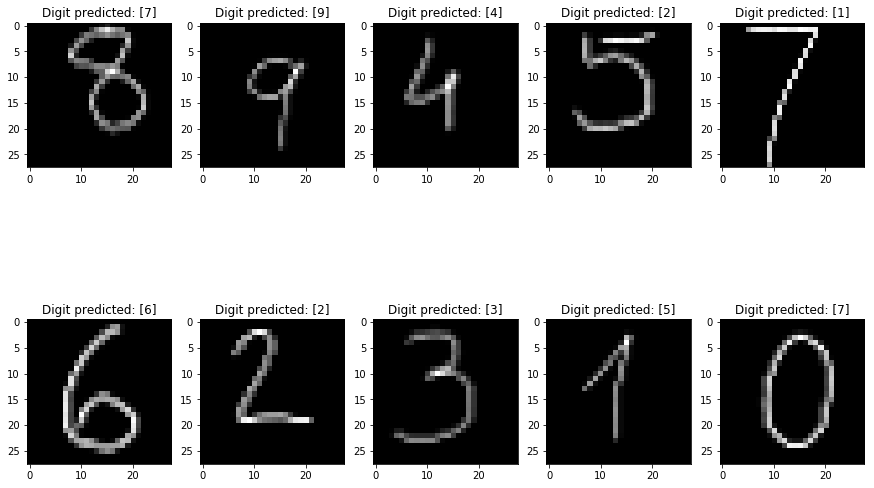

In [39]:
fig = plt.figure(figsize=(15, 10))
accuracies = []
path = "./my_numbers"
i = 1
for f in os.listdir(path):
    if ".png" in f and not "background" in f:
        fig.add_subplot(2,5,i)
        my_image = imageio.imread("{}/{}".format(path,f))
        image_to_predict = my_image / 255. # All images in the training set have an range from 0-1 and not from 0-255
        plt.imshow(image_to_predict, cmap=plt.get_cmap('gray'))
        i += 1
        pred_digit = sess.run(tf.argmax(Y, 1), feed_dict={X: [image_to_predict.reshape(28,28,1)], tst: True, pkeep: 1.0, pkeep_conv: 1.0})
        if pred_digit == int(f[0]):
            accuracies.append(1)
        else:
            accuracies.append(0)
        plt.title("Digit predicted: {}".format(pred_digit))

In [40]:
print("Final accuracy on MY test: {}%".format(np.array(accuracies).mean()*100))

Final accuracy on MY test: 50.0%


# Results <a class="anchor" id="results"></a>

| Architecture | Test | My Data |
|------|------|------|------|
|Softmax| 91.8% | 20% | 
|5-fully connected| 98% | 40% | 
|Convolutional| 99.13% | 60% | 
|Convolutional batch| 99.53% | 50% | 

Too bad results on my own data are too low. One could think that because my own images are really different from the ones used to train the model, the machine is not able to predict them correctly. Even though the architectures are good enough to learn patterns I'm afraid we are still missing something. Something that's in the middle between __connectionist__ and __symbolic__ approaches.  

Text(0.5,1,'4 in MY set')

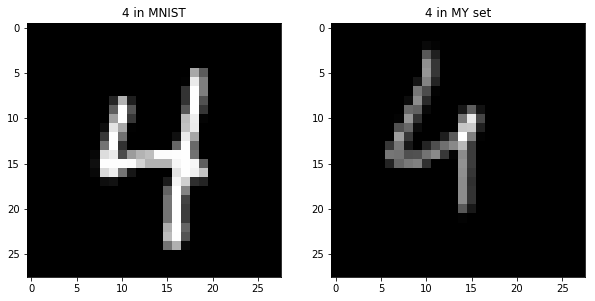

In [41]:
fig = plt.figure(figsize=(10, 5))
img_num = 19
mnist_4 = np.reshape(mnist.test.images[img_num, :], (28, 28)) # 28 by 28 matrix 
fig.add_subplot(1,2,1)
plt.imshow(mnist_4, cmap=plt.get_cmap('gray'))
plt.title("4 in MNIST")
my_4 = imageio.imread("./my_numbers/4.png") / 255.
fig.add_subplot(1,2,2)
plt.imshow(my_4, cmap=plt.get_cmap('gray'))
plt.title("4 in MY set")

In my opinion, if you show way less images than the ones we used to train the machine to recognize the digits to a kid and then you show him/her mine, he/she will be able to recognize them. 

Would there be another way rather than feeding the machine with 8 shifted 90º so we could teach it what the infinite symbol is? You can tell a kid "_hey, the infinite symbol is like an 8 that lays down on bed_" and even if they haven't been exposed ever to an infinite symbol they'll be able to recognize it at first sight! 

## Addendum <a class="anchor" id="addendum"></a>

Actually, the closest I make my images look like to the ones in the MNIST data set, the better the results get. Images in MNIST are much more thicker and brighter. What if I just make the images a little bit brighter?

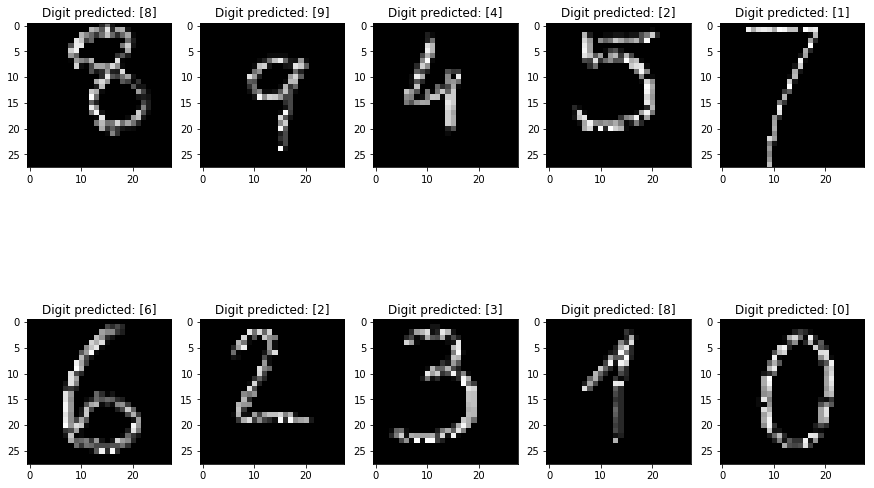

In [45]:
fig = plt.figure(figsize=(15, 10))
accuracies = []
path = "./my_numbers"
i = 1
for f in os.listdir(path):
    if ".png" in f and not "background" in f:
        fig.add_subplot(2,5,i)
        my_image = imageio.imread("{}/{}".format(path,f))
        image_to_predict = my_image*10 / 255. # All images in the training set have an range from 0-1 and not from 0-255
        plt.imshow(image_to_predict, cmap=plt.get_cmap('gray'))
        i += 1
        pred_digit = sess.run(tf.argmax(Y, 1), feed_dict={X: [image_to_predict.reshape(28,28,1)], tst: True, pkeep: 1.0, pkeep_conv: 1.0})
        if pred_digit == int(f[0]):
            accuracies.append(1)
        else:
            accuracies.append(0)
        plt.title("Digit predicted: {}".format(pred_digit))

In [46]:
print("Final accuracy on MY test: {}%".format(np.array(accuracies).mean()*100))

Final accuracy on MY test: 70.0%


| Architecture | Test | My Data | My Data Brighter
|------|------|------|------|------|
|Softmax| 91.8% | 20% | |
|5-fully connected| 98% | 40% || 
|Convolutional| 99.13% | 60% | |
|Convolutional batch| 99.53% | 50% | 70%

__TODO's__:
* Create a batch of my own images and add (append to the existing  model if possible) them to the train stage.